# Melchizedek Ackah-Blay
## 05-30-2024
## Exam Scores Project - Logistic Regression Portion

#

##### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### importing dataset and displaying top rows

In [3]:
exams = pd.read_csv(r'/Users/melki/Desktop/exams.csv')
exams.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63


##### cleaning up the data: renaming and removing some columns

In [6]:
exams.rename(columns = {'math score':'math_score','reading score':'reading_score','writing score':'writing_score', 'parental level of education':'parental_education_level','race/ethnicity':'race_or_ethnicity'}, inplace = True)


In [10]:
# renaming test preparation course
exams.rename(columns = {'test preparation course':'test_prep_course'}, inplace = True)

In [12]:
# dropping columns not needed for analysis
exams.drop(columns = ['lunch','race_or_ethnicity','parental_education_level', 'gender'], inplace = True)

In [14]:
# checking the unique values in test_prep_course, our target variable
exams['test_prep_course'].unique()

array(['completed', 'none'], dtype=object)

In [15]:
# checking for null values
exams.isna().sum()

test_prep_course    0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [16]:
# making 'test_prep_course' a numeric column
exams['test_prep_course'] = [1 if values == 'completed' else 0 for values in exams['test_prep_course']]

Text(0, 0.5, 'Counts')

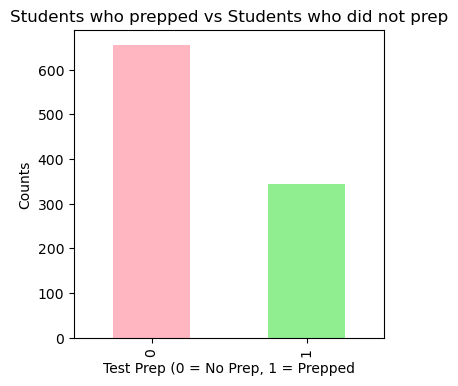

In [20]:
# visualizing the counts of 'test_prep_course' column 
plt.figure(figsize = (4,4))
exams['test_prep_course'].value_counts().plot(kind = 'bar', color = ['lightpink', 'lightgreen'])
plt.title('Students who prepped vs Students who did not prep')
plt.xlabel('Test Prep (0 = No Prep, 1 = Prepped')
plt.ylabel('Counts')

#

##### splitting the exams dataset into X and y

In [21]:
X = exams.drop(columns = ['test_prep_course'])
y = exams['test_prep_course']

#####

##### normalizing X

In [23]:
from sklearn import preprocessing

In [24]:
# creating scaler variable
scaler = preprocessing.StandardScaler()

In [26]:
# using the scaler to fit and transform X values
X_scaled = scaler.fit_transform(X)

In [27]:
# viewing X_scaled
X_scaled

array([[-0.57798657, -0.02709151,  0.58994292],
       [ 1.84942581,  1.60407283,  1.18920774],
       [-0.70919805,  0.39842962,  0.52335794],
       ...,
       [-0.05314065,  1.10763151,  1.12262276],
       [ 0.79973397,  0.11474887, -0.47541676],
       [-0.64359231, -1.65825585, -1.60736142]])

####

##### training and testing the data

In [28]:
from sklearn import model_selection

In [29]:
# initializing trainer
trainer = model_selection.train_test_split

In [30]:
X_train, X_test, y_train, y_test = trainer(X_scaled, y, test_size = 0.3, random_state = 777)

In [31]:
# viewing X_train
X_train

array([[-0.90601527, -1.01997415, -0.6751717 ],
       [-0.18435213,  0.96579113,  1.12262276],
       [-0.44677509, -0.02709151,  0.25701802],
       ...,
       [ 1.45579137,  1.67499302,  1.58871762],
       [ 0.27488805, -0.23985208, -0.3422468 ],
       [-1.62767841, -0.87813378, -0.60858672]])

####

##### setting up logistic regression model

In [32]:
from sklearn import linear_model

In [33]:
# initializing logistic regression model
lr = linear_model.LogisticRegression()

In [34]:
# training the model
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
# finding coefficients
lr.coef_

array([[-0.34326667, -1.4916563 ,  2.52415883]])

##### 'writing score' has the strongest relationship with if a student prepped or not out of all our X/predictor variables

In [39]:
# make predictions
predictions = lr.predict(X_test)

####

##### evaluation the model

In [40]:
from sklearn import metrics

In [41]:
scorer = metrics.accuracy_score
accuracy = scorer(y_test, predictions)
accuracy

0.6933333333333334

##### accuracy of the model is 69.33%. the model predicted whether a student prepped or not correctly 69.33% of the time

In [42]:
# classification report
reporter = metrics.classification_report
print(reporter(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       185
           1       0.66      0.41      0.51       115

    accuracy                           0.69       300
   macro avg       0.68      0.64      0.64       300
weighted avg       0.69      0.69      0.67       300



##### interpretation:

##### classes: 0 = Not Prepped, 1 = Prepped

#### Performance Metrics:

#####  Precision: Among students who did not prep, the precision was 0.70 meaning that when the model predicted a student did not prep, it was correct 70% of the time. Likewise, the precision score for students who prepped was 66%, meaning that when the model predicted a student prepped, it was correct 66% of the time

##### Recall: The recall for the students who did not prep was 0.87 meaning that the model correctly identifies 87% of the students who did not prep. Likewise, the recall of 41% (quite low) for students who prep means that the model correctly identifies 41% of the students who actually prepped

##### F1 Score: Given the F1 score and the other metrics, the student works best when predicting students who did not prep than students who prepped for their exams.

In [43]:
# confusion matrix
matrix = metrics.confusion_matrix
print(matrix(y_test, predictions))

[[161  24]
 [ 68  47]]


##### interpretation:

##### 161 represents the number of students the model predicted not to have prepped and did not prep
##### 24 represents the number of students the model predicted to have prepped but did not prep
##### 68 represents the number of students the model predicted not to have prepped but did prep
##### 47 represents the number of students the model predicted to have prepped and did prep

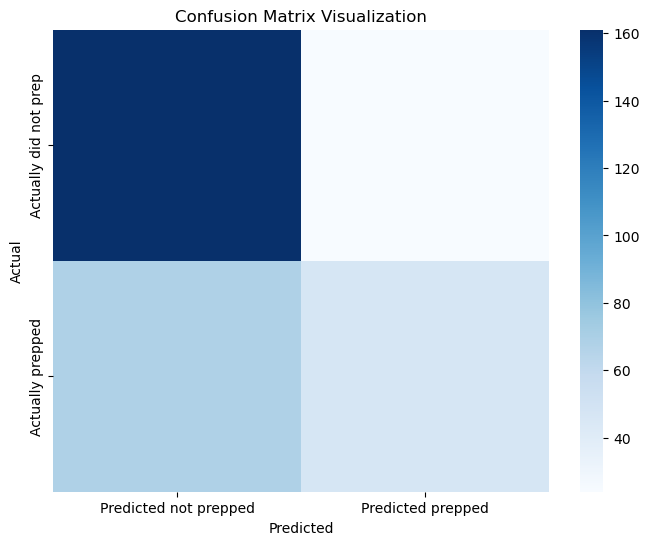

In [53]:
# confusion matrix visualization
cm = [[161,24],[68,47]]
plt.figure(figsize = (8,6))
sns.heatmap(cm, cmap = 'Blues', xticklabels = ['Predicted not prepped', 'Predicted prepped'], yticklabels = ['Actually did not prep', 'Actually prepped'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Visualization')
plt.show()


## Given that reading is analogous to writing, can we predicted a student's reading score based on their writing and math score? (LINEAR REGRESSION)

###

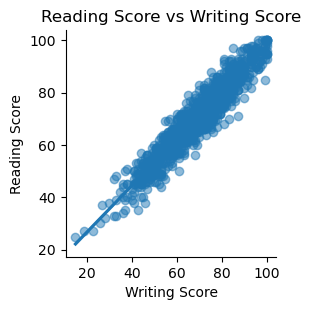

In [57]:
# using line plot to find similarities between reading and writing
sns.lmplot(x = 'writing_score', y = 'reading_score', data = exams, scatter_kws = {'alpha':0.5}, height = 3)
plt.title('Reading Score vs Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Reading Score')
plt.show()

##### not surprising there is a direct,` positive linear relationship between reading and writing

#####

##### splitting the exams data into X (independent) and y (dependent) variables

In [58]:
from sklearn import model_selection

In [59]:
trainer = model_selection.train_test_split

In [60]:
X = exams[['math_score','writing_score']]
y = exams['reading_score']

In [61]:
X_train, X_test, y_train, y_test = trainer(X, y, test_size = 0.3, random_state = 555)

####

##### linear regression model

In [62]:
from sklearn import linear_model

In [63]:
# initializing linear regression model
lm = linear_model.LinearRegression()

In [64]:
# training the model
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
# finding model intercept
lm.intercept_

7.21055696311803

In [88]:
# find model R-Squared
lm.score(X_train, y_train)

0.9066712111335863

##### A big R-Squared of 0.906 suggests that about 90.6% of the variance in the dependent variable (reading score) can be explained the independent variables (math and writing scores), which is great!

#####

In [67]:
# finding model coefficients
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
cdf

,Coefficients
math_score,0.148528
writing_score,0.768202


##### judging by the coefficients, writing score is not related to the reading score of a student at 0.768 which is 5 times higher than math score's coefficient

In [68]:
# making predictions
predictions = lm.predict(X_test)

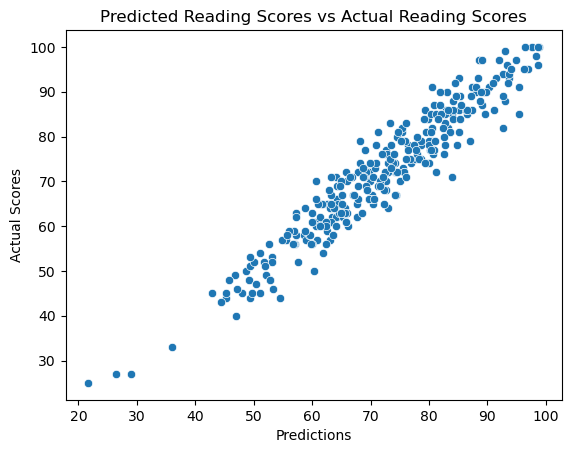

In [72]:
# scatterplot using histogram to compare the predictions to the actual data, y_test
sns.scatterplot(x = predictions, y = y_test)
plt.title('Predicted Reading Scores vs Actual Reading Scores')
plt.xlabel('Predictions')
plt.ylabel('Actual Scores')
plt.show()

##### The appears to be a linear relationship between predicted reading scores and actual reading score, hinting at the model being very good at predicting the real scores students had for reading 

####

##### evaluating the model 

In [76]:
from sklearn import metrics
import math

In [77]:
mae = metrics.mean_absolute_error
mse = metrics.mean_squared_error

In [78]:
print('Model MSE is ', mse(y_test, predictions))
print('Model MAE is ', mae(y_test, predictions))
print('Model RMSE is ', math.sqrt(mse(y_test, predictions)))

Model MSE is  16.992393307803102
Model MAE is  3.283687206254643
Model RMSE is  4.12218307548356


####

##### calcualting and plotting residuals

   ##### MSE (16.99): This value indicates that, on average, the squared errors between the actual and predicted reading scores are about 16.99. Because the errors are squared, this metric disproportionately weights larger errors, making it sensitive to outliers.
   ##### MAE (3.28): This value suggests that, on average, the model's predictions are off by about 3.28 points from the actual reading scores. MAE is a more direct measure of average error and is less sensitive to outliers compared to MSE and RMSE.
   ##### RMSE (4.12): This value indicates that the typical deviation (in the same units as the reading scores) of the predicted scores from the actual scores is about 4.12. RMSE provides a balance between the interpretability of MAE and the sensitivity to larger errors of MSE.

In [81]:
#residuals = actual values - predictions
residuals = y_test - predictions

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


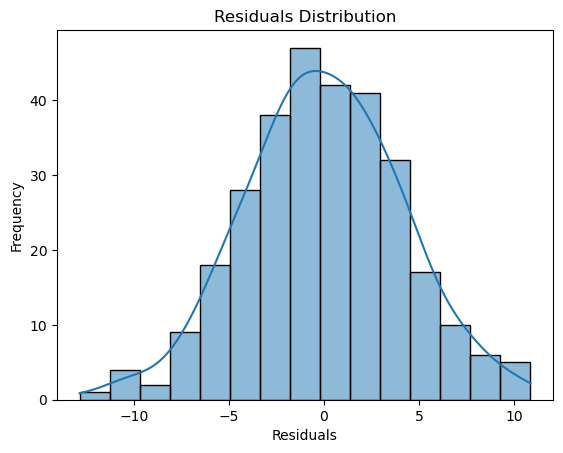

In [84]:
# using a histogram to plot residual values and check if they are normally distributed
sns.histplot(residuals, kde = True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

##### The residuals plot of a regression model is normally distributed, it provides confidence in the validity and reliability of the model's estimates and inferences

##### it suggests that the assumptions of the linear regression model are met, and the model is likely to provide reliable estimates and valid inferences

####

##### QQ Plot 

In [85]:
import scipy.stats as stats
import pylab

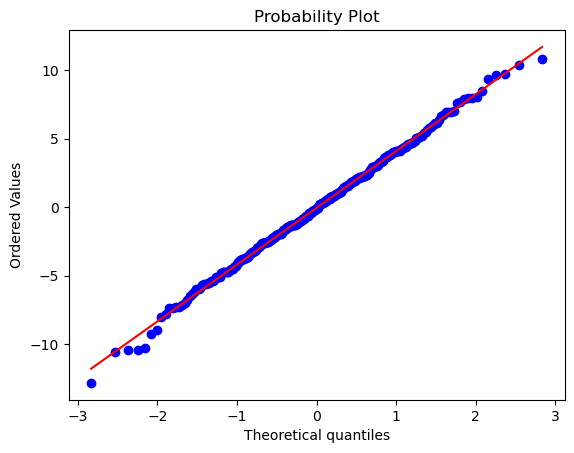

In [87]:
stats.probplot(residuals, dist = 'norm', plot = pylab)
pylab.show()

#### Interpretation: The Q-Q plot shows a near-perfect linear relationship between the theoretical quantiles and the ordered values, indicating that the data closely follows the theoretical distribution

#
#

##### NOTE: HYPOTHESIS TESTING IS IN THE R-FILES
#